<a href="https://colab.research.google.com/github/Saurabh019/Incubyte_Campus_placement-2023-/blob/main/California_housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt


In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

In [4]:
print(housing.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [5]:
print(housing.data.shape)

(20640, 8)


In [6]:
print(housing.target)

[4.526 3.585 3.521 ... 0.923 0.847 0.894]


In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train_full,X_test,y_train_full,y_test = train_test_split(housing.data,housing.target,random_state=42)
X_train,X_valid,y_train,y_valid = train_test_split(X_train_full,y_train_full,random_state=42)

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [10]:
np.random.seed(42)
tf.random.set_seed(42)

In [11]:
X_train.shape

(11610, 8)

In [13]:
model = keras.models.Sequential([
    keras.layers.Dense(30,activation="relu",input_shape=[8]),
    keras.layers.Dense(30,activation="relu"),
    keras.layers.Dense(1)
])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                270       
                                                                 
 dense_1 (Dense)             (None, 30)                930       
                                                                 
 dense_2 (Dense)             (None, 1)                 31        
                                                                 
Total params: 1231 (4.81 KB)
Trainable params: 1231 (4.81 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [18]:
model.compile(loss="mean_squared_error",
optimizer=keras.optimizers.SGD(lr=1e-3),
metrics=['mae'])

In [20]:
# We can divide the dataset of 2000 examples into batches of 500 then it will take 4 iterations to
# complete 1 epoch.

In [21]:
model_history = model.fit(X_train,y_train,epochs=20,validation_data=(X_valid,y_valid))

Epoch 1/20
363/363 [==============================] - 3s 4ms/step - loss: 0.8388 - mae: 0.6560 - val_loss: 5.6770 - val_mae: 0.5718
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5412 - mae: 0.5027 - val_loss: 1.6771 - val_mae: 0.4870
Epoch 3/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4647 - mae: 0.4804 - val_loss: 3.7783 - val_mae: 0.4863
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4324 - mae: 0.4612 - val_loss: 8.5884 - val_mae: 0.5056
Epoch 5/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3982 - mae: 0.4467 - val_loss: 3.9061 - val_mae: 0.4819
Epoch 6/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4171 - mae: 0.4443 - val_loss: 1.9760 - val_mae: 0.4525
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3816 - mae: 0.4328 - val_loss: 0.3566 - val_mae: 0.4210
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.

In [22]:
mae_test = model.evaluate(X_test,y_test)

162/162 [==============================] - 0s 3ms/step - loss: 0.3426 - mae: 0.4190


In [25]:
model_history.history

{'loss': [0.8387768268585205,
  0.5412130951881409,
  0.4647442400455475,
  0.4324168562889099,
  0.39824214577674866,
  0.4170931577682495,
  0.38156431913375854,
  0.36441296339035034,
  0.35933688282966614,
  0.3561996519565582,
  0.3543049991130829,
  0.35192543268203735,
  0.34778621792793274,
  0.3449866771697998,
  0.3431805372238159,
  0.3407565653324127,
  0.3380209505558014,
  0.33607053756713867,
  0.3353680670261383,
  0.33463358879089355],
 'mae': [0.6560155153274536,
  0.502655565738678,
  0.48036709427833557,
  0.4611968994140625,
  0.44674816727638245,
  0.4442828893661499,
  0.43279728293418884,
  0.42707425355911255,
  0.42225372791290283,
  0.4209088981151581,
  0.41903233528137207,
  0.4175157845020294,
  0.41510921716690063,
  0.41282328963279724,
  0.412102609872818,
  0.41059184074401855,
  0.40883442759513855,
  0.4071228802204132,
  0.4063963294029236,
  0.4053885340690613],
 'val_loss': [5.677025318145752,
  1.6770631074905396,
  3.778310537338257,
  8.5883960

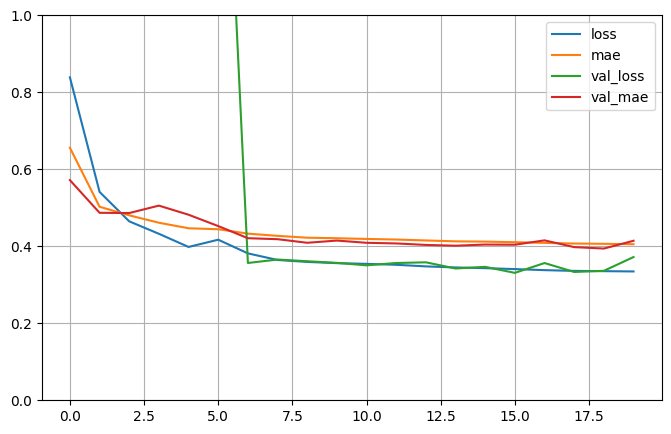

In [27]:
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [28]:
X_new = X_test[:4]
y_pred = model.predict(X_new)
print(y_pred)
print(y_test[:4])

1/1 [==============================] - 0s 115ms/step
[[0.68760484]
 [1.5510802 ]
 [4.4943595 ]
 [2.8459473 ]]
[0.477   0.458   5.00001 2.186  ]
